In [1]:
from keras.models import model_from_json, load_model
from keras.utils import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.applications.xception import Xception, preprocess_input
from keras.utils import img_to_array, load_img
from keras.models import Model
from pickle import load, dump
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("image_encodings.pkl", "rb") as f:
  image_encodings = load(f)

with open("train_captions.pkl", "rb") as f:
  train_captions = load(f)

with open("tokenizer.pkl", "rb") as f:
  tokenizer = load(f)

with open("model.json", "r") as f:
  model = model_from_json(f.read())

In [3]:
#Loading the saved weights
model.load_weights("model.h5")
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 39)]         0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 39, 300)      823500      ['input_2[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 2048)         0           ['input_1[0][0]']                
                                                                                              

In [4]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [5]:
#Defining the generator function as discussed in the pre-processing notebook
def Generator(captions, img_encoding, max_length, dict_size, num_photos_per_batch):
  X1, X2, Y = list(), list(), list()
  n = 0
  while(1):
    for id, caption_list in captions.items():
      n += 1
      img = img_encoding[id]
      for caption in caption_list:
        sequence = tokenizer.texts_to_sequences([caption])[0]
        for i in range(1, len(sequence)):
          inp_sequence, out_sequence = sequence[:i], sequence[i]
          inp_sequence = pad_sequences([inp_sequence], maxlen = max_length, padding = 'post')[0]
          out_sequence = to_categorical([out_sequence], num_classes = dict_size)[0]
          X1.append(img)
          X2.append(inp_sequence)
          Y.append(out_sequence)
      if(n==num_photos_per_batch):
        yield [[np.array(X1), np.array(X2)], np.array(Y)]
        X1, X2, Y = list(), list(), list()
        n = 0

In [6]:
#Declaring global variables
max_length = 39
dict_size = 2745
target_size = (299, 299, 3)
embedding_size = 300
epochs = 10
num_images_per_batch = 6
steps = len(train_captions)//num_images_per_batch

In [8]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy',mode="max", patience=3,restore_best_weights=True)
callback1 = tf.keras.callbacks.EarlyStopping(monitor='loss',mode="min", patience=3,restore_best_weights=True)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/imp/",
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)

In [10]:
#Training the model for 20 epochs with batch_size as 5
for i in range(epochs):
  train_generator = Generator(train_captions, image_encodings, max_length, dict_size, num_images_per_batch)
  model.fit_generator(train_generator,
                      use_multiprocessing=True,
                      shuffle = True,
                      workers=10,max_queue_size=2,
                      callbacks=[callback,callback1,model_checkpoint_callback], 
                      steps_per_epoch = steps)
  

C:\Users\mithun\AppData\Local\Temp\ipykernel_10980\243449383.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,
Exception in thread Thread-3 (_run):
Traceback (most recent call last):
  File "c:\Program Files\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Program Files\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\mithun\AppData\Roaming\Python\Python310\site-packages\keras\utils\data_utils.py", line 907, in _run
    with closing(self.executor_fn(_SHARED_SEQUENCES)) as executor:
  File "C:\Users\mithun\AppData\Roaming\Python\Python310\site-packages\keras\utils\data_utils.py", line 894, in pool_fn
    pool = get_pool_class(True)(
  File "c:\Program Files\Python310\lib\multiprocessing\context.py", line 119, in Pool
    return Pool(processes, initializer, i

In [ ]:
model.save("tmodel.h5")

In [ ]:
!# chmod 755 clearcache.sh

In [ ]:
!wget https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip
!unzip Flickr8k_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/Flicker8k_Dataset/._342872408_04a2832a1b.jpg  
  inflating: Flicker8k_Dataset/3429142249_d09a32e291.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429142249_d09a32e291.jpg  
  inflating: Flicker8k_Dataset/3429194423_98e911a101.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429194423_98e911a101.jpg  
  inflating: Flicker8k_Dataset/3429351222_17ae744daf.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429351222_17ae744daf.jpg  
  inflating: Flicker8k_Dataset/3429351964_531de1bf16.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429351964_531de1bf16.jpg  
  inflating: Flicker8k_Dataset/3429391520_930b153f94.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429391520_930b153f94.jpg  
  inflating: Flicker8k_Dataset/3429465163_fb8ac7ce7f.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._3429465163_fb8ac7ce7f.jpg  
  inflating: Flicker8k_Dataset/3429581486_4556471d1a.jpg  
  inflating: __MACOSX/Flicker8k_Dataset/._34295

In [ ]:
#Loading the weights as generated in the last epoch of previous training process
model.load_weights(path+"tmodel.h5")
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics='accuracy')

#Tuning the hyperparameters
num_images_per_batch = 10
steps = len(train_captions)//num_images_per_batch
epochs = 2
model.optimizer.learning_rate = 0.0001

#Training it for 5 epochs
for i in range(epochs):
  generator = Generator(train_captions, train_image_encodings, max_length, dict_size, num_images_per_batch)
  model.fit_generator(generator,
                      shuffle=True,
                      use_multiprocessing=True,
                      workers=10,max_queue_size=2,
                      callbacks=[callback,callback1], 
                      steps_per_epoch = steps)
model.save("model_epoch54.h5")

In [ ]:
#model.save_weights("epoch24.h5")
model.load_weights("model_epoch54.h5")
#Reducing the learning rate to 0.00001 and training it for 5 more epochs
num_images_per_batch = 10
steps = len(train_captions)//num_images_per_batch
epochs = 5
model.optimizer.learning_rate = 0.00001
for i in range(epochs):
  generator = Generator(train_captions, train_image_encodings, max_length, dict_size, num_images_per_batch)
  model.fit_generator(generator,
                      use_multiprocessing=True,
                      workers=10,
                      callbacks=callback, 
                      steps_per_epoch = steps)
  model.save("model_epoch59.h5")

  3/600 [..............................] - ETA: 24s - loss: 1.9943

<ipython-input-14-941a8a58ff41>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, steps_per_epoch = steps)


600/600 [==============================] - 18s 31ms/step - loss: 1.9342


In [ ]:
#Saving the final model weights
model.save_weights("model_epoch59.h5")

In [ ]:
model.load_weights(path+"model_epoch34.h5")

In [ ]:
#Redefining the inceptionV3 model as done in pre-processing phase so that we can test the model on test set
incep = InceptionV3(weights = 'imagenet')
incep.layers.pop()
for layer in incep.layers:
  layer.trainable = False

inception = Model(inputs = incep.inputs, outputs = incep.layers[-2].output)
print(inception.summary())

96112376/96112376 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                  

In [ ]:
#Redefining the function as declared in pre-processing phase, that encodes a PIL image into image encodings that can be fed into the model as input
def encode_img(id, model):
  img = load_img("{}".format(id), target_size = (299, 299))
  img_ar = img_to_array(img)
  img_dim = np.expand_dims(img_ar, axis = 0)
  img_ = preprocess_input(img_dim)
  predict = model.predict(img_)
  predict = predict.reshape(predict.shape[1])
  #print(predict.shape)
  return np.array(predict)

In [ ]:
#Loading word_to_idx dictionary and idx_to_word dictionary which were pickled in pre-processing phase 
with open(path+"word_to_idx", "rb") as f:
  word_to_idx = load(f)

with open(path+"idx_to_word", "rb") as f:
  idx_to_word = load(f)

#Function that calls encode_image function to generate image encodings and also predicts the caption of the image
def predict_caption(id):
  encoded_img = np.expand_dims(encode_img(id, inception), axis = 0)
  text = 'startseq'
  for i in range(max_length):
    #Splitting the caption generated uptill now into words
    sequence = [word_to_idx[word] for word in text.split() if word in word_to_idx] 
    #Padding the sequence of words to the length of max_length by adding 0's at the end
    sequence = np.expand_dims(pad_sequences([sequence], maxlen = max_length, padding = "post")[0], axis = 0)
    #Predicting the captionword by word
    y_hat = model.predict([encoded_img, sequence], verbose = 0)
    #Selecting the index with maximum probabilty in the prediction generated
    y_hat = np.argmax(y_hat)
    #Converting the index into word using idx_to_word dictionary
    word = idx_to_word[y_hat]
    #Adding the predicted word into final caption 
    text += ' ' + word
    #Words are generated untill 'endseq' is encountered
    if word == 'endseq':
      break
  return text

In [ ]:
def beam_search(id, beam):
  encoded_img = np.expand_dims(encode_img(id, inception), axis = 0)
  start = [word_to_idx['startseq']]
  start_word = [[start,0.0]]
  while len(start_word[0][0]) < max_length:
    temp = []
    for s in start_word:
      #Padding the sequence of words to the length of max_length by adding 0's at the end
      sequence = np.expand_dims(pad_sequences([s[0]], maxlen = max_length, padding = "post")[0], axis = 0)
      #Predicting the captionword by word
      y_hat = model.predict([encoded_img, sequence], verbose = 0)
      sorting_word_pred = np.argsort(y_hat[0])[-beam:]
      for w in sorting_word_pred:
        caption, prob = s[0][:], s[1]
        caption.append(w)
        prob += np.log(y_hat[0][w])
        temp.append([caption, prob])

    start_word = temp
    start_word = sorted(start_word, key = lambda l : l[1])
    start_word = start_word[-beam:]
  start_word = start_word[-1][0]
  cap = [idx_to_word[i] for i in start_word]
  caption = []
  for i in cap:
    if i=='endseq':
      break 
    caption.append(i)
  caption = ' '.join(caption[1:])
  return caption

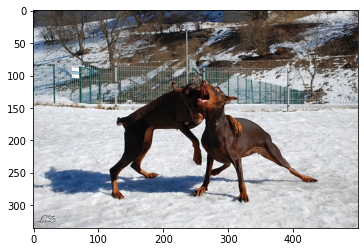

1/1 [==============================] - 8s 8s/step
Caption:   a brown dog is running on snow 


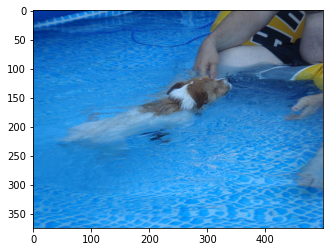

1/1 [==============================] - 0s 31ms/step
Caption:   a man and a woman are sitting on a bench in front of a large bay 


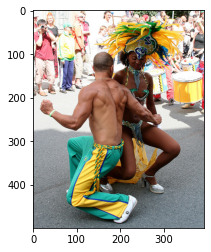

1/1 [==============================] - 0s 24ms/step
Caption:   a man in a blue shirt is standing in a crowd of people 


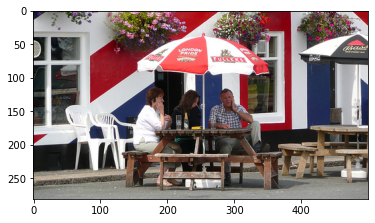

1/1 [==============================] - 0s 28ms/step
Caption:   a man in a checked jacket is walking down a sidewalk 


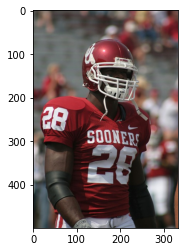

1/1 [==============================] - 0s 24ms/step
Caption:   a football player in a red jersey is being tackled by a player in red 


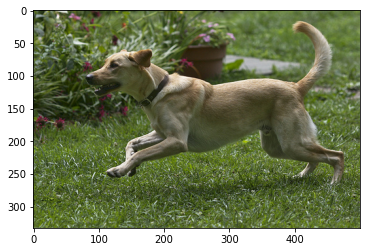

1/1 [==============================] - 0s 29ms/step
Caption:   a dog runs through the grass 


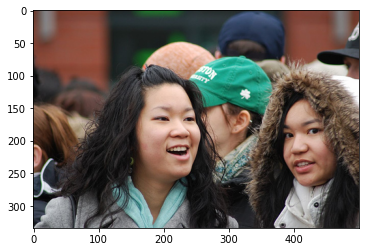

1/1 [==============================] - 0s 30ms/step
Caption:   a woman in a red jacket is talking to a man in a black jacket 


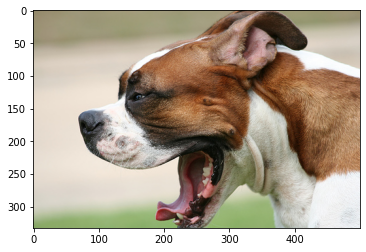

1/1 [==============================] - 0s 68ms/step
Caption:   a dog is licking its nose 


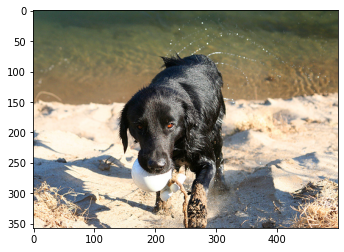

1/1 [==============================] - 0s 58ms/step
Caption:   a black dog is running through the water 


In [ ]:
with open(path+"Flickr_8k.testImages.txt", "r") as f:
  test_images = f.read()

#We will test the first 10 images in the test set 
i = 0
for line in test_images.split("\n"):
  i += 1
  id = line.split('.')[0]
  img = plt.imread("Flicker8k_Dataset/{}.jpg" .format(id))
  plt.imshow(img)
  plt.show()
  pred = predict_caption("Flicker8k_Dataset/{}.jpg" .format(id))
  print("Caption: ", pred[8:-6])
  if(i==9):
    break

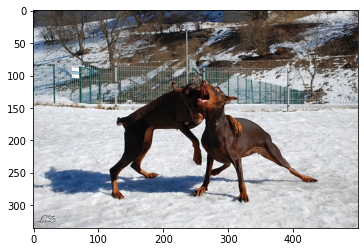

1/1 [==============================] - 0s 58ms/step
Caption:  a brown dog and a brown dog are playing in the snow


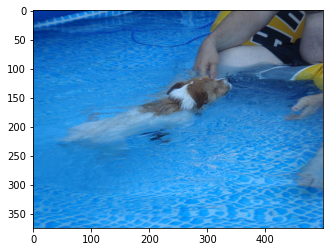

1/1 [==============================] - 0s 23ms/step
Caption:  a man and a woman are sitting on a bench in front of a pool


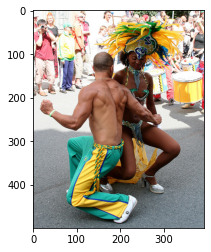

1/1 [==============================] - 0s 49ms/step
Caption:  a group of people are standing in front of a large class


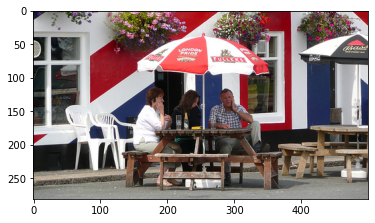

1/1 [==============================] - 0s 25ms/step
Caption:  people are sitting on a bus stop


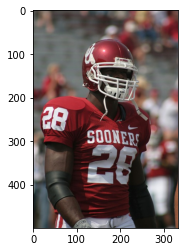

1/1 [==============================] - 0s 24ms/step
Caption:  a football player in a red jersey is being tackled by another player


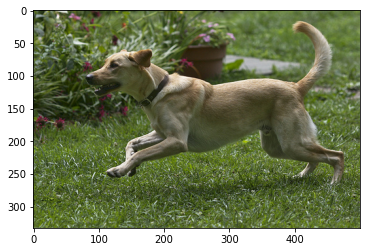

1/1 [==============================] - 0s 27ms/step
Caption:  a brown dog is running through a field of yellow flowers


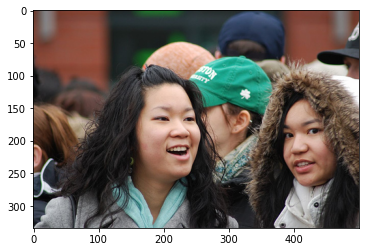

1/1 [==============================] - 0s 28ms/step
Caption:  a woman in a black jacket and a woman in a black suit


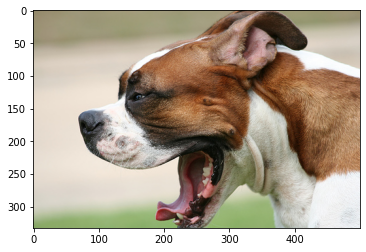

1/1 [==============================] - 0s 24ms/step
Caption:  a brown and white dog is playing with a red ball


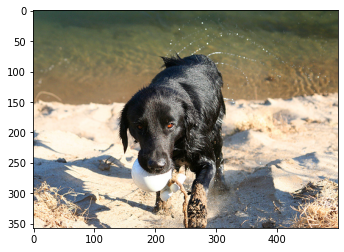

1/1 [==============================] - 0s 33ms/step
Caption:  a black dog is running through the water


In [ ]:
with open(path+"Flickr_8k.testImages.txt", "r") as f:
  test_images = f.read()

#We will test the first 10 images in the test set 
i = 0
for line in test_images.split("\n"):
  i += 1
  id = line.split('.')[0]
  img = plt.imread("Flicker8k_Dataset/{}.jpg" .format(id))
  plt.imshow(img)
  plt.show()
  pred = beam_search("Flicker8k_Dataset/{}.jpg" .format(id), 3)
  print("Caption: ", pred[:])
  if(i==9):
    break

In [ ]:
!wget https://www.google.com/imgres?imgurl=https%3A%2F%2Fstatic1.bigstockphoto.com%2F9%2F1%2F3%2Flarge1500%2F319698259.jpg&imgrefurl=https%3A%2F%2Fwww.bigstockphoto.com%2Fimage-319698259%2Fstock-photo-two-dogs-are-fighting-on-the-street-agressive-dogs-dog-attack&tbnid=9OEMlzl-86YzrM&vet=12ahUKEwjM6Kb1hvz8AhUm7nMBHe5ECuwQMygHegUIARDUAQ..i&docid=0IbY_iGlXA500M&w=1500&h=1120&q=two%20dogs%20fighting&client=firefox-b-d&ved=2ahUKEwjM6Kb1hvz8AhUm7nMBHe5ECuwQMygHegUIARDUAQ

--2023-02-04 14:16:55--  https://www.google.com/imgres?imgurl=https%3A%2F%2Fstatic1.bigstockphoto.com%2F9%2F1%2F3%2Flarge1500%2F319698259.jpg
Resolving www.google.com (www.google.com)... 173.194.79.99, 173.194.79.103, 173.194.79.106, ...
Connecting to www.google.com (www.google.com)|173.194.79.99|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.google.com/imghp [following]
--2023-02-04 14:16:55--  https://www.google.com/imghp
Reusing existing connection to www.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘imgres?imgurl=https:%2F%2Fstatic1.bigstockphoto.com%2F9%2F1%2F3%2Flarge1500%2F319698259.jpg’

imgres?imgurl=https     [ <=>                ]  13.49K  --.-KB/s    in 0s      

2023-02-04 14:16:55 (91.8 MB/s) - ‘imgres?imgurl=https:%2F%2Fstatic1.bigstockphoto.com%2F9%2F1%2F3%2Flarge1500%2F319698259.jpg’ saved [13818]



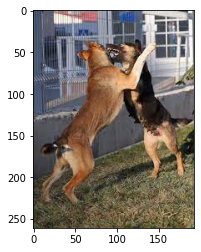

1/1 [==============================] - 0s 29ms/step
Caption:   a dog is running on the grass 


In [ ]:
#Greedy Search
img = plt.imread("test1.jpg")
plt.imshow(img)
plt.show()
pred = predict_caption("test1.jpg")
print("Caption: ", pred[8:-6])

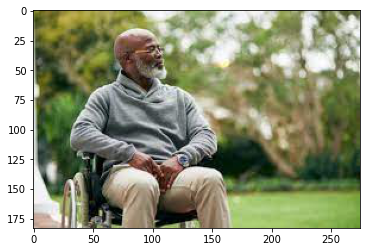

1/1 [==============================] - 0s 26ms/step
Caption:   a young girl wearing a pink dress is sitting on a bench amongst a wooden bench 


In [ ]:
#Greedy Search
img = plt.imread("test2.jpg")
plt.imshow(img)
plt.show()
pred = predict_caption("test2.jpg")
print("Caption: ", pred[8:-6])

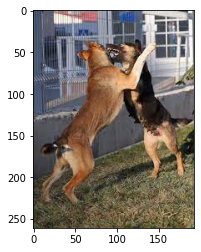

1/1 [==============================] - 0s 26ms/step
Caption:  a black and white dog is jumping up to catch a soccer ball


In [ ]:
#Beam Search
img = plt.imread("test1.jpg")
plt.imshow(img)
plt.show()
pred = beam_search("test1.jpg", 5)
print("Caption: ", pred[:])

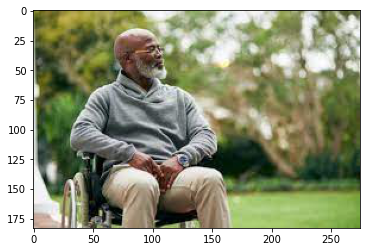

1/1 [==============================] - 0s 24ms/step
Caption:  a little girl in a pink dress is sitting on a wooden bench


In [ ]:
#Beam Search
img = plt.imread("test2.jpg")
plt.imshow(img)
plt.show()
pred = beam_search("test2.jpg", 5)
print("Caption: ", pred[:])